## 案例：Haar Cascades 笑容检测

## 案例概要

深度学习解决的问题之一是情绪识别问题。基本的想法是：给定一张脸的图像，你必须判断这个人是快乐、悲伤、愤怒还是中立。想想这可以用在什么地方？例如：建立一个基于用户情感的聊天机器人，与他们互动，并尝试改善他们的情绪。当然，我们不可能完全用 Cascades 来解决这个问题。因为 Cascades 是用于检测相关的问题而不是识别。但我们可以利用 Cascades 的技术对这种应用先睹为快。区分各种情绪的关键点之一是：微笑。如果一个人在微笑，我们可以有把握地认为这个人是快乐的。同样地，没有微笑可能意味着这个人愤怒、悲伤或中性。请注意，在某些应用场景下，我们可以通过选取特征，将识别问题简化为检测问题 —— 譬如本案例的笑容检测。

### 案例目标

在前面的案例中，您使用了组合的 Cascades 模型来执行眼睛检测、人脸检测和其他类似的目标检测任务。在本案例中，我们将考虑另一个对象检测问题场景：笑容检测。幸运的是，在 OpenCV 开源存储库中已经有一个这个级联模型，我们可以使用它来完成我们的任务。

我们将把这个活动分成两部分。

- 第一种方法，是使用笑容检测级联模型直接检测微笑；
- 第二种方法，是用组合检测实现正面人脸检测和笑容检测级联。

### 案例详细操作说明

#### 第一部分：

1. 导入所需的库。
2. 读取输入图像（`./data/eyes.jpeg`）并将其转换为灰度，如果需要的话，你还可以拷贝一个原始图像副本。
3. 创建一个变量，指定微笑检测级联模型 XML 文件的路径（`./data/haarcascade_smile.xml`），您将需要这个变量来加载级联。
4. 使用 cv2 `CascadeClassifier` 函数加载级联。(您必须提供 XML 文件的路径作为输入参数。这将是您在上一步中创建的变量。)
5. 进行多尺度检测，您可以使用您认为效果最好的 `scaleFactor` 和 `minNeighbors` 参数，可以从 `1.2`，`9` 开始尝试。
6. 在检测到的笑容周围创建一个边框（使用蓝色绘制），并显示最终图像，同时，您可以选择将其保存到本地。

完成了案例的第一部分。现在，通过组合使用这两个级联分类器，大致流程与第一部分类型，因此，我们建议您通过创建自定义的函数完成以下步骤:

#### 第二部分：

7. 创建自定义函数 `def detectionUsingCascades`，该函数具有三个输入变脸，包括：
   - `imageFile`：目标图像路径, 
   - `cascadeFile1`：正面人脸检测 Cascade 模型 XML 文件路径
   - `cascadeFile2`：笑容检测 Cascade 模型 XML 文件路径  

8. 加载正面人脸检测和笑容检测模型，由于已创建了自定义函数，这里可以通过引用自定义函数中的变量名称 `cascadeFile1` 和 `cascadeFile2` 加载。
9. 首先使用正面人脸级联模型来检测图像中存在的人脸。提示：多尺度检测函数（detectMultiScale）将给出脸部周围的边框的列表作为输出。
   - 提示：由于此前我们已经在原始图像 `image` 上执行了单个笑容级联模型的检测与边框绘制。因此，这里应在原始图像副本 `imageCopy`上执行。
10. 遍历检测到的每个面部的边框列表，获取边框坐标来裁剪出图像上的正面人脸部分。
   <img src="./img/12.jfif" width="30%">
11. 对于每个裁剪出来的脸部图像，使用笑容级联模型检测笑容。
12. 最后，显示输入图像，并在笑容和面部周围分辨绘制边框。

这样，您应该在人脸上有一个边界框，同时，人脸在检测到的微笑上也有一个边界框，效果图如下所示:

<img src="./img/14.jfif" width="80%">

### 案例小结

以下为完成案例后的两种方法对比图 ——

<img src="./img/smile-combined-result-1.png" width="30%" align="left"><img src="./img/smile-combined-result-2.png" width="30%">

完成本案例后，你能用这种方法来判断一个人是否快乐吗？我们在这项活动中讨论的这项技术的最大缺点是，它假定一个微笑就足以告诉我们一个人是否快乐。面部的其他部分，比如：面部肌肉在识别面部情绪时也会出现。这就是为什么在这些情况下，深度学习模型超过了简单的机器学习模型，因为它们可以考虑大量的特征来预测输出。

我们还可以使用 OpenCV 函数，如： `cv2.VideoCapture(0)` 和 `cv2.VideoCapture('recorded_video_file_name')`，将输入图像替换为来自网络摄像头的视频流或录制的视频文件，对视频内的对象实现检测。

### 案例答案

#### 第一部分

In [1]:
# 导入必要的库
import cv2                       # 导入OpenCV
import numpy as np               # 导入numPy    
import matplotlib.pyplot as plt  # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

In [2]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab5/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# Step 2 – 加载图片
image = cv2.imread("./data/eyes.jpeg")
    
# Step 2 – 使用cv2.imread函数加载图像
imageCopy = image.copy()

# Step 2 – 将图片从BGR转换为灰度
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
# 创建微笑检测级联模型 XML 文件的路径变量
smileCascade = "./data/haarcascade_smile.xml"

In [4]:
# 使用 cv2 CascadeClassifier 函数加载级联
haarCascade = cv2.CascadeClassifier(smileCascade)

In [5]:
# 使用正面笑容级联模型来检测图像中存在的笑容
detectedObjects = haarCascade.detectMultiScale(gray, 1.2, 9)

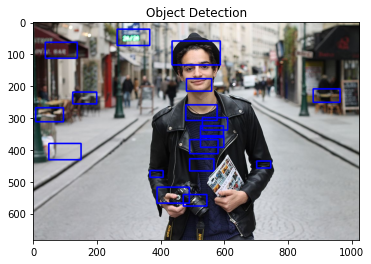

True

In [6]:
# 遍历检测到的笑容的边框列表中的每一张图像
for bbox in detectedObjects:
        
        # 每个bbox都是一个矩形，表示被检测对象（笑容）周围的边框
        x, y, w, h = bbox
        # 为了与后面人脸检测的边框区分颜色，这里使用BRG蓝色绘制
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 3)

# 将图像从 BGR 转换为 RGB
plt.imshow(image[:,:,::-1])                  
# 指定输出图像的标题
plt.title('Object Detection')                
# 显示图像
plt.show()                                   

# 将完成检测的图像保存在本地存储上，您可以随时在目录下查看
cv2.imwrite(result_path+"smile-combined-result-1.png",image) 

In [7]:
# Step 7 – # 这是一个自定义函数，负责使用 haarCascade 模型进行目标检测
# 该函数以图像文件和Cascades 模型文件的路径作为输入，
# 并返回围绕检测到的对象实例的边框
def detectionUsingCascades(imageFile, cascadeFile1, cascadeFile2):

    """这里是步骤2-步骤6的自定义的函数利用级联模型进行目标检测。
       该函数接受图像文件和级联模型文件的路径作为输入，并返回
       围绕检测到的对象实例的边框列表。"""

    # Step 8 – 加载 haarCascade 正面人脸检测与笑容检测两个模型
    # 如前所述，cv2.CascadeClassifier函数使用XML文件的路径作为输入
    # 而该路径，正好是我们的自定义函数 detectionUsingCascades 的第二/第三个输入参数
    # 分别是：cascadeFile1, cascadeFile2
    haarCascade1 = cv2.CascadeClassifier(cascadeFile1)
    haarCascade2 = cv2.CascadeClassifier(cascadeFile2)

    # Step 9 – 执行多尺寸检测
    # 使用正面人脸级联模型来检测图像中存在的人脸
    # 另外，注意我们已经静态指定了参数的值 - scaleFactor和minNeighbors（1.2, 9）
    detectedObjects = haarCascade1.detectMultiScale(gray, 1.2, 9)

    # Step 10 – 勾画检测边框
    # 遍历检测到的人脸的边框列表中的每一张图像
    # 获取边框坐标来裁剪出图像上的正面人脸部分
    for bbox in detectedObjects:
        
        # 每个 bbox 都是一个矩形，
        # 表示被检测对象周围的边框
        x, y, w, h = bbox
        # 为了与眼睛检测的边框区分颜色，这里使用BRG红色绘制
        cv2.rectangle(imageCopy, (x, y), (x+w, y+h), (0, 0, 255), 3)
        
        # 裁剪出图像中被检测出正面人脸的区域
        # 使用imageCopy拷贝一份裁剪后的图像拷贝
        crop = gray[y:y+h, x:x+w]
        imgCrop = imageCopy[y:y+h, x:x+w]
        cv2.imwrite(result_path+"crop.png",imgCrop)
        
        # stop 11 - 使用笑容检测模型，在裁剪后的正面人脸图片上进一步检测图像中存在的笑容
        cropDetectedObjects = haarCascade2.detectMultiScale(crop, 1.2, 9)
        
        # 遍历检测到的笑容的边框列表中的每一张图像
        for bbox2 in cropDetectedObjects:
            
            # 每个bbox2都是一个矩形，表示被检测对象（眼睛）周围的边框
            X, Y, W, H = bbox2
            # 为了与眼睛检测的边框区分颜色，这里使用BRG蓝色绘制
            cv2.rectangle(imageCopy, (x+X,y+Y), (x+X+W, y+Y+H), (255,0,0), 3)

    # Step 12 – 显示输出

    # cv2.imshow("Object Detection", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    
    cv2.imwrite(result_path+"smile-combined-result-2.png",imageCopy)
    
    plt.imshow(imageCopy[:,:,::-1])              # 将图像从 BGR 转换为 RGB
    plt.title('Object Detection')                # 指定输出图像的标题
    plt.show()                                   # 显示图像

    # Step 12 – 返回围绕检测到的对象实例的边框列表
    return detectedObjects

根据自定义函数 `detectionUsingCascades`，按顺序输入原始图像、正面人脸检测模型路径、眼睛检测级联模型路径，执行函数。实现检测图像的输出。

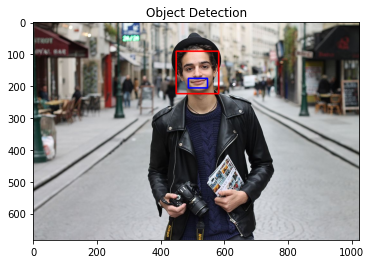

In [8]:
smileDetection = detectionUsingCascades("./data/eyes.jpeg",
                              "./data/haarcascade_frontalface_default.xml",
                              "./data/haarcascade_smile.xml")